In [2]:
import opendatasets as od
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset=('https://www.kaggle.com/datasets/akashguna/netflix-prize-shows-information')

In [4]:
od.download(dataset)

Skipping, found downloaded files in ".\netflix-prize-shows-information" (use force=True to force download)


In [5]:
data_dir=('.\netflix-prize-shows-information')

In [6]:
import pandas as pd
data_df = pd.read_csv('netflix-prize-shows-information/imdb_processed.csv')

In [7]:
data_df
# separate movies and tv shows, breakdown/go thru what 'kinds' of productions are available
# How many different 'kinds' of shows are available? Which kind is the most predominant?
# Which genre is the most popular? How many different genres are available to choose from? 
# The most votes per country for each title, *which country's movie/title is the most popular by vote?
# How many/which directors direct a production/s that can be translated to a language other than english? 
  # (Which directors are promoting more diversity thru the production of the thier titles?)
# Is there a correlation between how old the movie is (year released), and number of votes (popularity)? Are more recent titles more popular?

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,8446,All Monsters Attack,1969.0,movie,"['Adventure', 'Family', 'Fantasy']",3.9,4384.0,['Japan'],['Japanese'],"['Tomonori Yazaki', 'Hideyo Amamoto', 'Sachio ...","['Ishirô Honda', 'Jun Fukuda', 'Kengo Furusawa']",['Kunio Miyauchi'],"[""Shin'ichi Sekizawa""]",NaN
8447,8447,Fidel Castro,2005.0,episode,"['Documentary', 'Biography', 'History']",6.4,44.0,NaN,"['English', 'Spanish']","['Rena Baskin', 'Fulgencio Batista', 'James Bl...","['Adriana Bosch', 'M Pink Christofalo']",['Mason Daring'],['Adriana Bosch'],NaN
8448,8448,Epoch,2001.0,tv movie,"['Sci-Fi', 'Thriller']",4.9,2376.0,['United States'],['English'],"['David Keith', 'Stephanie Niznik', ""Ryan O'Ne...",['Matt Codd'],['Richard McHugh'],"['Jonathan Raymond', 'Jonathan Raymond', 'Phil...",NaN
8449,8449,The Company,2003.0,movie,"['Drama', 'Music', 'Romance']",6.3,6501.0,"['United States', 'Germany', 'United Kingdom']",['English'],"['Neve Campbell', 'Malcolm McDowell', 'James F...",['Robert Altman'],['Van Dyke Parks'],"['Neve Campbell', 'Barbara Turner', 'Barbara T...",NaN


In [8]:
data_df.isnull().sum()

Unnamed: 0       0
title            0
year             0
kind             0
genre           67
rating         316
vote           316
country        299
language       399
cast           171
director      1311
composer      2729
writer        1247
runtime       1653
dtype: int64

In [9]:
data_df.columns

Index(['Unnamed: 0', 'title', 'year', 'kind', 'genre', 'rating', 'vote',
       'country', 'language', 'cast', 'director', 'composer', 'writer',
       'runtime'],
      dtype='object')

In [10]:
data_df["year"].max()

2005.0

In [11]:
clean_nf_df = data_df.dropna()
clean_nf_df
clean_nf_df.isnull().sum()


Unnamed: 0    0
title         0
year          0
kind          0
genre         0
rating        0
vote          0
country       0
language      0
cast          0
director      0
composer      0
writer        0
runtime       0
dtype: int64

In [12]:
print(len(clean_nf_df))

4133


In [13]:
clean_nf_df

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0
7,7,7 Seconds,2005.0,video movie,"['Action', 'Comedy', 'Crime', 'Thriller']",4.8,7153.0,"['United Kingdom', 'Romania', 'Switzerland', '...",['English'],"['Wesley Snipes', 'Tamzin Outhwaite', 'Deobia ...",['Simon Fellows'],"['Barry Taylor', 'Neal Acree']",['Martin Wheeler'],118.0
8,8,By Dawn's Early Light,1990.0,tv movie,"['Action', 'Drama', 'Thriller']",7.1,2898.0,['United States'],"['English', 'Russian']","['Powers Boothe', 'Rebecca De Mornay', 'James ...",['Jack Sholder'],['Trevor Jones'],"['William Prochnau', 'Bruce Gilbert']",58.0
9,9,Seeta Aur Geeta,1972.0,movie,"['Adventure', 'Comedy', 'Drama', 'Family', 'Mu...",6.8,1818.0,['India'],['Hindi'],"['Dharmendra', 'Sanjeev Kumar', 'Hema Malini',...",['Ramesh Sippy'],['Rahul Dev Burman'],"['Javed Akhtar', 'Javed Akhtar', 'Satish Bhatn...",15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260,7260,À Nous la Liberté,1931.0,movie,"['Comedy', 'Musical']",7.5,4333.0,['France'],['French'],"['Henri Marchand', 'Raymond Cordy', 'Rolla Fra...",['René Clair'],['Georges Auric'],['René Clair'],100.0
7261,7261,Shade,2003.0,movie,"['Crime', 'Thriller']",6.3,12485.0,['United States'],['English'],"['Joe Nicolo', 'Carl Mazzocone Sr.', 'George T...",['Damian Nieman'],['James Johnzen'],['Damian Nieman'],106.0
7262,7262,Nothing But Trouble,1991.0,movie,['Comedy'],5.1,23598.0,['United States'],['English'],"['Chevy Chase', 'Dan Aykroyd', 'John Candy', '...",['Dan Aykroyd'],['Michael Kamen'],"['Peter Aykroyd', 'Dan Aykroyd']",92.0
7263,7263,The Whistle Blower,1986.0,movie,['Thriller'],6.2,2069.0,['United Kingdom'],"['English', 'Russian']","['Michael Caine', 'James Fox', 'Nigel Havers',...",['Simon Langton'],['John Scott'],"['Julian Bond', 'John Hale']",123.0


In [14]:
clean_nf_df["kind"].unique()

array(['movie', 'video movie', 'tv movie', 'episode', 'tv short',
       'video game'], dtype=object)

In [15]:
episode = clean_nf_df.loc[clean_nf_df["kind"] == "episode"]
episode

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
95,95,Blood Will Out,1999.0,episode,"['Crime', 'Drama', 'Mystery']",7.4,794.0,['United Kingdom'],['English'],"['John Nettles', 'Daniel Casey', 'Jane Wymark'...",['Moira Armstrong'],['Jim Parker'],"['Douglas Watkinson', 'Caroline Graham']",118.0
106,106,Strangler's Wood,1999.0,episode,"['Crime', 'Drama', 'Mystery']",7.9,899.0,['United Kingdom'],['English'],"['John Nettles', 'Daniel Casey', 'Jane Wymark'...",['Jeremy Silberston'],['Jim Parker'],"['Anthony Horowitz', 'Caroline Graham']",93.0
225,225,A Morbid Taste for Bones,1996.0,episode,"['Crime', 'Drama', 'History', 'Mystery']",8.1,190.0,['United Kingdom'],['English'],"['Derek Jacobi', 'Michael Culver', 'Julian Fir...",['Richard Stroud'],['Colin Towns'],"['Christopher Russell', 'Edith Pargeter']",90.0
348,348,Cry of the Cat: Part 2,1998.0,episode,"['Family', 'Fantasy', 'Horror', 'Mystery', 'Th...",5.5,529.0,['Canada'],['English'],"['Hamille Rustia', 'Corey Sevier', 'Arthur Eng...",['Ron Oliver'],['Brad MacDonald'],"['Ron Oliver', 'Jeff Ross', 'R.L. Stine']",90.0
374,374,Sharpe's Enemy,1994.0,episode,"['Action', 'Adventure', 'Drama', 'History', 'W...",7.9,2648.0,['United Kingdom'],['English'],"['Sean Bean', ""Daragh O'Malley"", 'Hugh Fraser'...",['Tom Clegg'],"['Dominic Muldowney', 'John Tams']","['Eoghan Harris', 'Bernard Cornwell']",94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6828,6828,School's Out! The Musical,2005.0,episode,"['Animation', 'Adventure', 'Comedy', 'Family',...",7.4,362.0,['United States'],['English'],"['Tara Strong', 'Daran Norris', 'Susanne Blake...","['Butch Hartman', 'Ken Bruce', 'Gary Conrad']","['Butch Hartman', 'Steve Marmel', 'Guy Moon']","['Butch Hartman', 'Steve Marmel', 'Butch Hartm...",86.0
6842,6842,Caught on a Train,1980.0,episode,['Drama'],7.8,355.0,"['United Kingdom', 'United States']",['English'],"['Peggy Ashcroft', 'Michael Kitchen', 'Wendy R...",['Peter Duffell'],['Mike Westbrook'],['Stephen Poliakoff'],52.0
6914,6914,Murder on the Links,1996.0,episode,"['Crime', 'Drama', 'Mystery', 'Thriller']",7.9,1615.0,['United Kingdom'],['English'],"['David Suchet', 'Hugh Fraser', 'Diane Fletche...",['Andrew Grieve'],['Christopher Gunning'],"['Agatha Christie', 'Anthony Horowitz']",49.0
7194,7194,The Greatest Collection of Them All,1973.0,episode,"['Crime', 'Drama', 'Mystery']",7.9,112.0,['United States'],['English'],"['George Peppard', 'Penny Fuller', 'Mike Farre...",['George McCowan'],"['Jack Elliott', 'Allyn Ferguson']","['Anthony Wilson', 'Theodore J. Flicker']",58.0


In [16]:
tv_movie = clean_nf_df.loc[clean_nf_df["kind"] == "tv movie"]
tv_movie

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
8,8,By Dawn's Early Light,1990.0,tv movie,"['Action', 'Drama', 'Thriller']",7.1,2898.0,['United States'],"['English', 'Russian']","['Powers Boothe', 'Rebecca De Mornay', 'James ...",['Jack Sholder'],['Trevor Jones'],"['William Prochnau', 'Bruce Gilbert']",58.0
10,10,Strange Relations,2001.0,tv movie,"['Drama', 'Comedy']",7.6,768.0,"['United Kingdom', 'United States']",['English'],"['Paul Reiser', 'Amber Sealey', 'Lachele Carl'...",['Paul Seed'],['Rupert Gregson-Williams'],['Tim Kazurinsky'],75.0
12,12,Boycott,2001.0,tv movie,"['Drama', 'History']",7.2,901.0,['United States'],['English'],"['Jeffrey Wright', 'Terrence Howard', 'CCH Pou...",['Clark Johnson'],['Joseph Vitarelli'],"['Stewart Burns', 'Herman Daniel Farrell', 'Ti...",87.0
42,42,Inside the Space Station,2000.0,tv movie,['Documentary'],6.6,76.0,['United States'],['English'],['Liam Neeson'],['Pierre de Lespinois'],['Michael Whalen'],['Stephen Jay Schwartz'],150.0
81,81,Chasing Freedom,2004.0,tv movie,['Drama'],6.5,398.0,"['Canada', 'United States']",['English'],"['Juliette Lewis', 'Layla Alizada', 'Bruce Gra...",['Don McBrearty'],['Jonathan Goldsmith'],['Barbara Samuels'],84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,7217,Baywatch: Hawaiian Wedding,2003.0,tv movie,"['Action', 'Adventure', 'Drama']",4.1,2141.0,['United States'],['English'],"['David Hasselhoff', 'Pamela Anderson', 'Micha...",['Douglas Schwartz'],"[""John D'Andrea"", 'Cory Lerios']","['Michael Berk', 'Douglas Schwartz', 'Gregory ...",102.0
7220,7220,The Waiting Time,1999.0,tv movie,"['Crime', 'Thriller']",6.4,82.0,['United Kingdom'],['English'],"['John Thaw', 'Zara Turner', 'Mark Pegg', 'Str...",['Stuart Orme'],['Colin Towns'],"['Patrick Harbinson', 'Gerald Seymour']",92.0
7223,7223,Big Bird in Japan,1988.0,tv movie,['Family'],7.2,202.0,"['Japan', 'United States']",['English'],"['Caroll Spinney', 'Brian Meehl', 'Maiko Kawak...",['Jon Stone'],"['Tony Geiss', 'Carol Hall', 'Dick Lieb']",['Jon Stone'],107.0
7224,7224,Book of Days,2003.0,tv movie,['Drama'],5.0,277.0,['United States'],['English'],"['Wil Wheaton', 'Maureen Flannigan', 'Deborah ...",['Harry Ambrose'],['John Batdorf'],['Susan Rohrer'],91.0


In [17]:
total_type = clean_nf_df.groupby(["kind"]).count()["title"]
total_type

kind
episode         127
movie          3128
tv movie        497
tv short          2
video game        2
video movie     377
Name: title, dtype: int64

In [18]:
video_movie = clean_nf_df.loc[clean_nf_df["kind"] == "video movie"]
video_movie

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
7,7,7 Seconds,2005.0,video movie,"['Action', 'Comedy', 'Crime', 'Thriller']",4.8,7153.0,"['United Kingdom', 'Romania', 'Switzerland', '...",['English'],"['Wesley Snipes', 'Tamzin Outhwaite', 'Deobia ...",['Simon Fellows'],"['Barry Taylor', 'Neal Acree']",['Martin Wheeler'],118.0
15,15,FernGully 2: The Magical Rescue,1998.0,video movie,"['Animation', 'Adventure', 'Family', 'Fantasy']",4.6,1484.0,['United States'],['English'],"['James S. Baker', 'Matt K. Miller', 'Erik Ber...","['Phil Robinson', 'David Marshall']",['Nerida Tyson-Chew'],"['Richard Tulloch', 'Diana Young', 'Chris Fink']",117.0
24,24,The Bonesetter,2003.0,video movie,"['Horror', 'Thriller']",1.6,210.0,['Canada'],['English'],"['Brett Kelly', 'Sherry Thurig', 'Anne-Marie F...",['Brett Kelly'],['Sylvain Lavigne'],['Brett Kelly'],82.0
48,48,Bruce Lee: A Warrior's Journey,2000.0,video movie,"['Documentary', 'Action', 'Biography']",8.0,3007.0,"['United States', 'United Kingdom', 'Hong Kong']","['English', 'Cantonese']","['Bruce Lee', 'Kareem Abdul-Jabbar', 'Peter Ar...","['John Little', 'Bruce Lee']",['Wayne Hawkins'],"['Bruce Lee', 'John Little', 'Bey Logan']",98.0
58,58,DarkWolf,2003.0,video movie,['Horror'],2.7,1662.0,['United States'],['English'],"['Samaire Armstrong', 'Ryan Alosio', 'Andrea B...",['Richard Friedman'],['Geoff Levin'],"['Geoffrey Alan Holliday', 'Chuck Scholl', 'Ge...",101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,7093,Lust for Dracula,2004.0,video movie,['Horror'],3.4,335.0,['United States'],['English'],"['Darian Caine', 'Erin Brown', 'Julian Wells',...",['Tony Marsiglia'],['Don Mike'],['Tony Marsiglia'],99.0
7108,7108,Mystic Iran: The Unseen World,2002.0,video movie,['Documentary'],6.4,59.0,['Iran'],['English'],"['Shohreh Aghdashloo', 'Aryana Farshad']",['Aryana Farshad'],['Ahmad Pezhman'],"['Janelle Balnicke', 'Aryana Farshad']",89.0
7181,7181,The PhanDom Menace,2002.0,video movie,['Documentary'],7.7,29.0,['Australia'],['English'],"['Don Bies', 'Chris Brennan', 'Karen Fletcher'...","['Warwick Holt', 'Craig E. Tonkin']","['James Evans', 'Martin Evans', 'Brett Harring...","['Warwick Holt', 'Craig E. Tonkin']",80.0
7206,7206,Active Stealth,1999.0,video movie,"['Adventure', 'Action', 'Crime', 'War']",3.3,532.0,['United States'],['English'],"['Daniel Baldwin', 'Hannes Jaenicke', 'Lisa Vi...",['Fred Olen Ray'],"['David Wurst', 'Eric Wurst']",['Steve Latshaw'],94.0


In [19]:
# values = ["episode", "video games", "tv short"]
# test = (clean_nf_df[clean_nf_df.kind!="episode"])
# test2 = (clean_nf_df[clean_nf_df.kind!="video games"])
# test3 = (clean_nf_df[clean_nf_df.kind!="tv short"])
indexNames = clean_nf_df[(clean_nf_df["runtime"] >200) | (clean_nf_df["kind"] == "episode") | (clean_nf_df["kind"] == "tv short") |(clean_nf_df["kind"] == "video game")].index
clean_nf_df.drop(indexNames , inplace=True)

C:\Users\khanh.le.BOD-KHANHLM\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
# test
# test_unique = test["kind"].unique()
# test_unique
clean_nf_df["kind"].unique()

array(['movie', 'video movie', 'tv movie'], dtype=object)

In [21]:
clean_nf_df

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0
7,7,7 Seconds,2005.0,video movie,"['Action', 'Comedy', 'Crime', 'Thriller']",4.8,7153.0,"['United Kingdom', 'Romania', 'Switzerland', '...",['English'],"['Wesley Snipes', 'Tamzin Outhwaite', 'Deobia ...",['Simon Fellows'],"['Barry Taylor', 'Neal Acree']",['Martin Wheeler'],118.0
8,8,By Dawn's Early Light,1990.0,tv movie,"['Action', 'Drama', 'Thriller']",7.1,2898.0,['United States'],"['English', 'Russian']","['Powers Boothe', 'Rebecca De Mornay', 'James ...",['Jack Sholder'],['Trevor Jones'],"['William Prochnau', 'Bruce Gilbert']",58.0
9,9,Seeta Aur Geeta,1972.0,movie,"['Adventure', 'Comedy', 'Drama', 'Family', 'Mu...",6.8,1818.0,['India'],['Hindi'],"['Dharmendra', 'Sanjeev Kumar', 'Hema Malini',...",['Ramesh Sippy'],['Rahul Dev Burman'],"['Javed Akhtar', 'Javed Akhtar', 'Satish Bhatn...",15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260,7260,À Nous la Liberté,1931.0,movie,"['Comedy', 'Musical']",7.5,4333.0,['France'],['French'],"['Henri Marchand', 'Raymond Cordy', 'Rolla Fra...",['René Clair'],['Georges Auric'],['René Clair'],100.0
7261,7261,Shade,2003.0,movie,"['Crime', 'Thriller']",6.3,12485.0,['United States'],['English'],"['Joe Nicolo', 'Carl Mazzocone Sr.', 'George T...",['Damian Nieman'],['James Johnzen'],['Damian Nieman'],106.0
7262,7262,Nothing But Trouble,1991.0,movie,['Comedy'],5.1,23598.0,['United States'],['English'],"['Chevy Chase', 'Dan Aykroyd', 'John Candy', '...",['Dan Aykroyd'],['Michael Kamen'],"['Peter Aykroyd', 'Dan Aykroyd']",92.0
7263,7263,The Whistle Blower,1986.0,movie,['Thriller'],6.2,2069.0,['United Kingdom'],"['English', 'Russian']","['Michael Caine', 'James Fox', 'Nigel Havers',...",['Simon Langton'],['John Scott'],"['Julian Bond', 'John Hale']",123.0


In [22]:
# d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}
# pd.DataFrame(data=d, index=[0, 1, 2, 3])

# new_reduced_df = {'Title': []}

new_reduced_df = clean_nf_df.drop(['Unnamed: 0','vote', 'country', 'language', 'cast', 'director', 'composer', 'writer'], axis = 1)
new_reduced = new_reduced_df.reset_index(drop=True)
new_reduced

# Thanksgiving = new_reduced.loc[new_reduced["title"] == "Thanksgiving Family Reunion"]
# Thanksgiving

,title,year,kind,genre,rating,runtime
0,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,60.0
1,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,96.0
2,7 Seconds,2005.0,video movie,"['Action', 'Comedy', 'Crime', 'Thriller']",4.8,118.0
3,By Dawn's Early Light,1990.0,tv movie,"['Action', 'Drama', 'Thriller']",7.1,58.0
4,Seeta Aur Geeta,1972.0,movie,"['Adventure', 'Comedy', 'Drama', 'Family', 'Mu...",6.8,15.0
...,...,...,...,...,...,...
3895,À Nous la Liberté,1931.0,movie,"['Comedy', 'Musical']",7.5,100.0
3896,Shade,2003.0,movie,"['Crime', 'Thriller']",6.3,106.0
3897,Nothing But Trouble,1991.0,movie,['Comedy'],5.1,92.0
3898,The Whistle Blower,1986.0,movie,['Thriller'],6.2,123.0


In [23]:
new_reduced["year"] = new_reduced["year"].astype("int")
new_reduced["runtime"] = new_reduced["runtime"].astype("int")
new_reduced

,title,year,kind,genre,rating,runtime
0,What the #$*! Do We (K)now!?,2004,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,60
1,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,96
2,7 Seconds,2005,video movie,"['Action', 'Comedy', 'Crime', 'Thriller']",4.8,118
3,By Dawn's Early Light,1990,tv movie,"['Action', 'Drama', 'Thriller']",7.1,58
4,Seeta Aur Geeta,1972,movie,"['Adventure', 'Comedy', 'Drama', 'Family', 'Mu...",6.8,15
...,...,...,...,...,...,...
3895,À Nous la Liberté,1931,movie,"['Comedy', 'Musical']",7.5,100
3896,Shade,2003,movie,"['Crime', 'Thriller']",6.3,106
3897,Nothing But Trouble,1991,movie,['Comedy'],5.1,92
3898,The Whistle Blower,1986,movie,['Thriller'],6.2,123


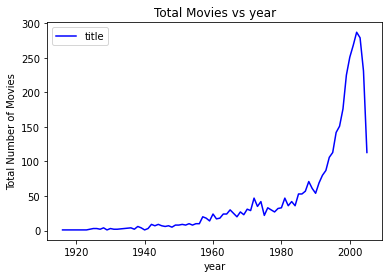

In [40]:
year = new_reduced["year"].value_counts()
year
year_counts = new_reduced.groupby("year").count()

pandas_line = year_counts[["title"]].rename(columns = {"Title":"Total Number of Movies"})
pandas_line.plot(kind = "line", color = "blue")
plt.ylabel("Total Number of Movies")
plt.title("Total Movies vs year")
plt.savefig("Total Movies vs Year_2005.jpg")
plt.show()

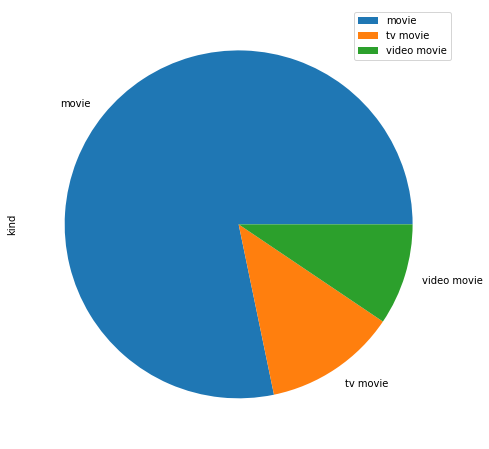

In [36]:
content = new_reduced["kind"].value_counts()
content
content.plot.pie(y= 'Content Type', figsize = (8,8))
plt.savefig("Content Type _Pie_2005.png") 
plt.legend();

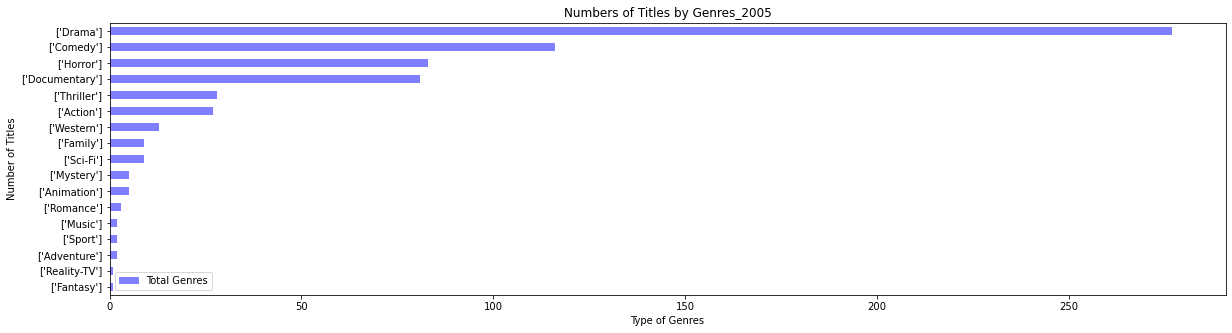

In [39]:
final_Production_countries = new_reduced.loc[new_reduced["genre"].str.contains(",")== False]
final_Production_countries
countries_count = final_Production_countries.groupby("genre").count()
group_data= final_Production_countries.groupby("genre")
countries_count_df = pd.DataFrame({"Total Genres":group_data['genre'].count()})
countries_count_df_sort = countries_count_df.sort_values(by=['Total Genres'], ascending=True)
countries_count_df_sort
pandas_bar = countries_count_df_sort[["Total Genres"]].rename(columns = {"Title":"Total Number of Movies"})
pandas_bar = countries_count_df_sort[["Total Genres"]]
pandas_bar.plot(kind = "barh", alpha = .50, figsize =(20,5), color = "blue")
plt.xlabel("Type of Genres")
plt.ylabel("Number of Titles")
plt.title("Numbers of Titles by Genres_2005")
plt.savefig("Numbers of Titles by Genres_2005.jpg")
plt.show()

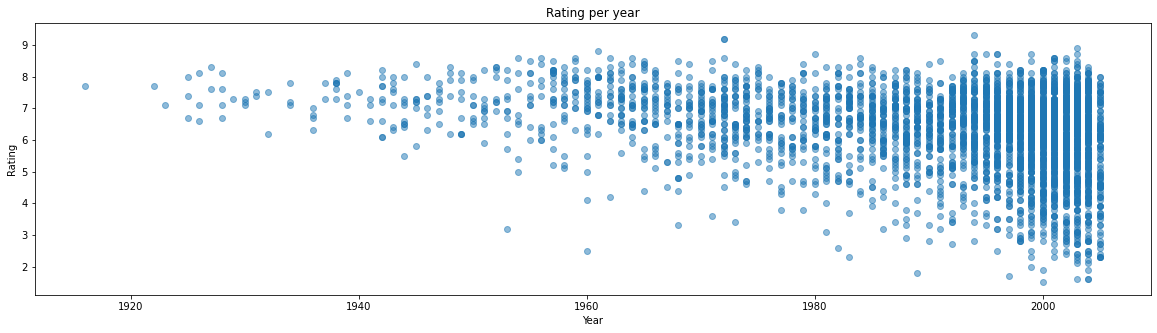

In [24]:
x = new_reduced["year"]
y = new_reduced["rating"]
plt.figure(figsize=(20, 5))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Rating per year')
plt.savefig("Rating per year.jpg")
plt.show()

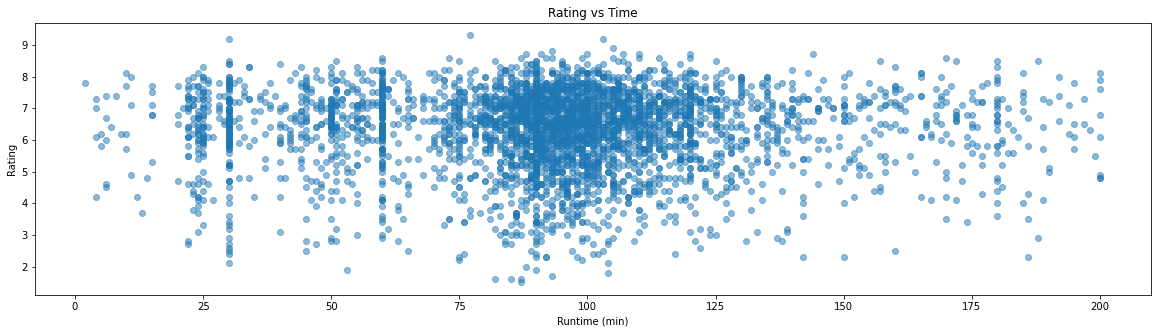

In [25]:
x = new_reduced["runtime"]
y = new_reduced["rating"]
plt.figure(figsize=(20, 5))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Runtime (min)')
plt.ylabel('Rating')
plt.title('Rating vs Time')
plt.savefig("Rating vs Time.jpg")
plt.show()

In [74]:
# movie_length = new_reduced.loc[new_reduced["runtime"] > 200]
# movie_length
print(len(new_reduced))

3900
